In [52]:
import scipy as syp
import scipy.special
import numpy as np 
import ScenarioGeneralizationBounds as scbn


# DEFINE BOUNDS FOR SCENARIO OPTIMIZATION PROGRAMS

Condier a data set of N vector samples (Scenarios) of uncertain parameters
$$\mathcal{D}_N=\{\delta_1,...,\delta_i,....,\delta_N\}$$ 
from a probability space $(\mathbb{P},\Delta,\mathcal{F})$

### A nn-convex scenario optimization program is 
$$\langle d^* \rangle=\arg\min_{d\in\Theta}  \{J(d) : g(d,\delta_i)\leq 0,~ \delta_i\in \mathcal{D}_N \}$$
where $J(d)$ is a cost function (possibly nonconvex), $g(d,\delta_i)$ is a (possibly nonconvex) constraint funtion, each scenario imposeds a constraint in correspondance of the desing $d$, $d$ is a vector of desing variables constrained in a closed set \Theta, $d^*$ is the optimized desing
 
### Scenario generalization certificates give formal bound $\epsilon$ on the violation probability defined as 
$$V(d^*)=\mathbb{P}[\delta \in \Delta: g(d,\delta_i)> 0] $$
$$\mathbb{P}^N[V(d^*)<\epsilon]\geq 1-\beta $$
where $\beta$ is a confidence level selected by the user (small $\beta$ means almost certainty)

For nonconvx problems the upper bound is a function $\epsilon=f(N,\beta,s_N^*)$ of the number of samples $N$, the coonfidence level $\beta$ and the number of support scenarios $s_N^*$ in corresponance of the $d^*$ or a posteriori by enumerating 
the support constraints.

In [2]:
# EXAMPLE HOW TO USE
N=10**5 # number of samples 
sn=300 # number of support constraints
beta=10**-8 # confidence parameter (small beta means almost cerainty)
scbn.getepsilon_nonconvex(sn,N,beta)

0.020477063634298243

In [3]:
import matplotlib.pyplot as plt 
beta=10**-6
SN=100
Nrange=range(SN,SN*100)
SNrange=range(10,SN,10) 
for k in SNrange:
    Epsilon_nnconvex = [scbn.getepsilon_nonconvex(k,i,beta) for i in Nrange] 
    plt.plot(Nrange,Epsilon_nnconvex)   
    
plt.xlabel('Number of samples')
plt.ylabel('$\epsilon$')
plt.grid(True)  

### A convex scenario optimization program with relaxed constraints
$$\langle d^* \zeta^* \rangle =\arg\min_{d\in\Theta,\zeta_i\geq 0} \{J(d) + \sum_i \zeta_i: g(d,\delta_i)\leq \zeta_i,~ \delta_i\in \mathcal{D}_N  \}$$ 
where $\zeta^*$ is a vector of non-negative slack variables and $g(d,\delta_i)$ and $J(d)$ are both convex in $d$

### Scenario generalization certificates give formal bound $\epsilon$ on the violation probability defined as 
$$V(d^*)=\mathbb{P}[\delta \in \Delta: g(d,\delta_i)> 0] $$
$$\mathbb{P}^N[\epsilon_l<V(d^*)<\epsilon_{u}]\geq 1-\beta $$
where $[\epsilon_l,\epsilon_u]$ are lower and upper bounds on the violation probability

Each bound is a function $\epsilon_i=f_i(N,\beta,s_N^*)$ of the number of scenarios $N$ in the data set, 
the confidence level $\beta$, and the number of support scenarios $s_N^*$, i.e., the number of samples $i$ leading to a $g(d^*,\delta_i) \geq 0 $

In [4]:
# EXAMPLE HOW TO USE
beta=10**-6 
N=10000
k=6610
Out1 , Out2 = scbn.getepsilon_relaxedConstraints(k,N,beta)
print([Out1,Out2])


[0.6309844763295013, 0.6894254477459933]


In [51]:
beta=10**-6 
SN=50
Nrange=range(SN,SN*20,10) 
SNrange=range(10,SN,10) 
for k in SNrange: 
    Epsilon_lw=[] 
    Epsilon_up=[]
    for i in Nrange: 
   # Out1 ,Out2 =  [getConfidence_relaxedConstraints(k,i,beta) for i in Nrange]  
        Out1 ,Out2 =  scbn.getepsilon_relaxedConstraints(k,i,beta)
        Epsilon_lw += [Out1]
        Epsilon_up += [Out2]   
    plt.plot(Nrange,Epsilon_lw,'b')
    plt.plot(Nrange,Epsilon_up,'r')
    
plt.xlabel('Number of samples')
plt.ylabel('$[\epsilon,\epsilon]$')
plt.grid(True) 

NameError: name 'plt' is not defined

### Bounds for convex scenario program with k scenario removed (sample and discard bouns)

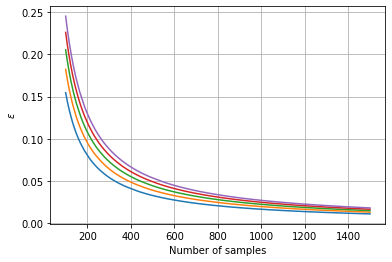

In [6]:

N=5000 #number of samples
beta=10**-6 #confidence level
Nd=2 # number of optimization variables 
Nrange=range(100,1500)#number of samples
Krange=range(0,5) #nuber of samples removed from the data base
for k in Krange:
    Epsilon_convex_kremoved = [scbn.getepsilon_apriori_convex_discard(k,i,beta,Nd) for i in Nrange] 
    plt.plot(Nrange,Epsilon_convex_kremoved) 
    
plt.xlabel('Number of samples')
plt.ylabel('$\epsilon$')
plt.grid(True)  

### Convex hard-constrained programs with discarded samples (a-priori)

In [ ]:
N=1000 # Number of samples in the trainig set
beta=10**-8  # confidence level
Nd=15 # number of the design variables
K=0 # number of discarded samples
Epsilon=scbn.getepsilon_apriori_convex_discard(K,N,beta,50)
print("A priori bound for", Nd, "dimensional convex hard-constrained program with", K ," out of ", N, "discarded samples is: " ,   Epsilon) 

### Non-convex scenario programs (a-posteriori)

In [26]:
Nsupports=15 # number of support samples
Epsilon=scbn.getepsilon_nonconvex(Nsupports,N,beta)
print("A priori bound for", Nsupports, "supports, non-convex program with", N ,"samples: " ,   Epsilon) 

A priori bound for 15 supports, non-convex program with 1000 samples:  0.09492925204052283


### Convex soft-constrained scenario programs (a-posteriori)

In [48]:
Nsupports=15 # number of support samples
Epsilon=scbn.getepsilon_relaxedConstraints(Nsupports,N,beta)
print("A priori bound for", Nsupports, "supports, soft-constrained convex program with", N ,"samples: " ,   Epsilon) 

A priori bound for 15 supports, soft-constrained convex program with 500 samples:  (0, 0.1064671970210107)


 ###  Convex hard-constrained scenario programs (a-posteriori Wait and Judge method)

In [47]:
Nsupports=10 # Number of support scenarios
N=500 # number of data points (size of the data set)
beta=10**-8 
Out=scbn.getepsilon_aposteriori_convex_wej(Nsupports,N,beta)
Epsilon=Out[-1]
for i in range(0,Nsupports+1):
    Out=scbn.getepsilon_aposteriori_convex_wej(i,N,beta)
    Epsilon=Out[-1]
    print("A posteriori bound for", i, "supports, hard-constrained convex program with", N ,"samples: " ,   Epsilon) 

A priori bound for 0 supports, hard-constrained convex program with 500 samples:  0.042030935757793486
A priori bound for 1 supports, hard-constrained convex program with 500 samples:  0.046564903983380646
A priori bound for 2 supports, hard-constrained convex program with 500 samples:  0.048655296268407255
A priori bound for 3 supports, hard-constrained convex program with 500 samples:  0.04984041198622435
A priori bound for 4 supports, hard-constrained convex program with 500 samples:  0.05065238394308835
A priori bound for 5 supports, hard-constrained convex program with 500 samples:  0.05127713090041652
A priori bound for 6 supports, hard-constrained convex program with 500 samples:  0.05179227900225669
A priori bound for 7 supports, hard-constrained convex program with 500 samples:  0.05223617207957432
A priori bound for 8 supports, hard-constrained convex program with 500 samples:  0.052630270016379654
A priori bound for 9 supports, hard-constrained convex program with 500 sample